# Graph Visualizations i.e. Network Analysis


Networks, a.k.a graphs are useful modelling tool to model complex relational problems.

Networks are comprised of two main entities:
* Nodes: commonly represented as circles. In the academic literature, nodes are also known as "vertices"
* Edges: commonly represented as lines between circles

Edges denotes relationships between the nodes.

In a network, if two nodes are joined together by an edge, then they are neighbors of one another.

There are generally two types of networks - directed and undirected. In undirected networks, edges do not have a directionality associated with them. In directed networks, they do.


## Examples of networks
* Undirected network
    * Facebook's network: Individuals are nodes, edges are drawn between individuals who are FB friends with one another
* Directed Network
    * Air traffic network: Airports are nodes, flights between airports are the edges

# Network Analysis & Networkx

## Data Representation

In the `networkx` implementation, graph objects store their data in dictionaries. 

Nodes are part of the attribute `Graph.node`, which is a dictionary where the key is the node ID and the values are a dictionary of attributes. 

Edges are part of the attribute `Graph.edge`, which is a nested dictionary. Data are accessed as such: `G.edge[node1, node2]['attr_name']`.

Because of the dictionary implementation of the graph, any hashable object can be a node. This means strings and tuples, but not lists and sets.

## Dataset

https://csr.lanl.gov/data/cyber1/


This data set represents 58 consecutive days of de-identified event data collected from five sources within Los Alamos National Laboratory’s corporate, internal computer network.

The data sources include Windows-based authentication events from both individual computers and centralized Active Directory domain controller servers; process start and stop events from individual Windows computers; Domain Name Service (DNS) lookups as collected on internal DNS servers; network flow data as collected on at several key router locations; and a set of well-defined red teaming events that present bad behavior within the 58 days. In total, the data set is approximately 12 gigabytes compressed across the five data elements and presents 1,648,275,307 events in total for 12,425 users, 17,684 computers, and 62,974 processes.

Specific users that are well known system related (SYSTEM, Local Service) were not de-identified though any well-known administrators account were still de-identified. In the network flow data, well-known ports (e.g. 80, 443, etc) were not de-identified. All other users, computers, process, ports, times, and other details were de-identified as a unified set across all the data elements (e.g. U1 is the same U1 in all of the data). The specific timeframe used is not disclosed for security purposes. In addition, no data that allows association outside of LANL’s network is included. All data starts with a time epoch of 1 using a time resolution of 1 second. In the authentication data, failed authentication events are only included for users that had a successful authentication event somewhere within the data set.

We specificall are looking at the redteam dataset. 
This data presents specific events taken from the authentication data that present known redteam compromise events. These may be used as ground truth of bad behavior that is different from normal user and computer activity. Each event is on a separate line in the form of "time,user@domain,source computer,destination computer" and presents a compromise event at the given time. The values are comma delimited.

## Load Data

In [2]:
%matplotlib inline

import pandas as pd
import networkx as nx


df = pd.read_csv("data/redteam.txt")

G = nx.from_pandas_edgelist(df, 'src', 'dst')

## Basic Network Statistics

Let's first understand how the network is represented.

In [3]:
# Who are represented in the network?
list(G.nodes())

['C17693',
 'C1003',
 'C305',
 'C728',
 'C1173',
 'C294',
 'C5693',
 'C152',
 'C2341',
 'C332',
 'C4280',
 'C18025',
 'C1493',
 'C504',
 'C148',
 'C231',
 'C721',
 'C1567',
 'C19932',
 'C612',
 'C457',
 'C17600',
 'C2519',
 'C1275',
 'C1065',
 'C2669',
 'C529',
 'C395',
 'C3153',
 'C1610',
 'C3521',
 'C1124',
 'C3199',
 'C11727',
 'C754',
 'C126',
 'C9945',
 'C1448',
 'C1014',
 'C20819',
 'C18626',
 'C1222',
 'C89',
 'C1484',
 'C8490',
 'C3601',
 'C1784',
 'C11194',
 'C10577',
 'C18872',
 'C2597',
 'C2609',
 'C2849',
 'C3422',
 'C42',
 'C92',
 'C16088',
 'C886',
 'C10817',
 'C15232',
 'C801',
 'C1015',
 'C359',
 'C21963',
 'C1268',
 'C353',
 'C21814',
 'C10005',
 'C20966',
 'C853',
 'C923',
 'C11039',
 'C1616',
 'C583',
 'C346',
 'C20203',
 'C12448',
 'C1500',
 'C1479',
 'C3388',
 'C1461',
 'C1119',
 'C19156',
 'C18113',
 'C19803',
 'C17425',
 'C9692',
 'C7131',
 'C8172',
 'C7503',
 'C7597',
 'C2578',
 'C90',
 'C1477',
 'C4845',
 'C3292',
 'C2914',
 'C19356',
 'C798',
 'C302',
 'C1125'

### Exercise 1

Can you write a single line of code that returns the number of nodes in the graph?

Let's now figure out who is connected to who in the network

In [4]:
# Who is connected to who in the network?
list(G.edges())

[('C17693', 'C1003'),
 ('C17693', 'C305'),
 ('C17693', 'C728'),
 ('C17693', 'C1173'),
 ('C17693', 'C294'),
 ('C17693', 'C5693'),
 ('C17693', 'C152'),
 ('C17693', 'C2341'),
 ('C17693', 'C332'),
 ('C17693', 'C4280'),
 ('C17693', 'C504'),
 ('C17693', 'C148'),
 ('C17693', 'C231'),
 ('C17693', 'C721'),
 ('C17693', 'C1567'),
 ('C17693', 'C17600'),
 ('C17693', 'C2519'),
 ('C17693', 'C1275'),
 ('C17693', 'C2669'),
 ('C17693', 'C395'),
 ('C17693', 'C3153'),
 ('C17693', 'C1610'),
 ('C17693', 'C3521'),
 ('C17693', 'C1124'),
 ('C17693', 'C3199'),
 ('C17693', 'C11727'),
 ('C17693', 'C754'),
 ('C17693', 'C126'),
 ('C17693', 'C9945'),
 ('C17693', 'C1448'),
 ('C17693', 'C1014'),
 ('C17693', 'C20819'),
 ('C17693', 'C18626'),
 ('C17693', 'C1222'),
 ('C17693', 'C89'),
 ('C17693', 'C1484'),
 ('C17693', 'C8490'),
 ('C17693', 'C3601'),
 ('C17693', 'C1784'),
 ('C17693', 'C11194'),
 ('C17693', 'C10577'),
 ('C17693', 'C18872'),
 ('C17693', 'C2597'),
 ('C17693', 'C2609'),
 ('C17693', 'C2849'),
 ('C17693', 'C342

### Exercise 2

Can you write a single line of code that returns the number of relationships represented?

## Concept

A **network**, more technically known as a **graph**, is comprised of:

- a set of nodes
- joined by a set of edges

They can be represented as two lists:

1. A **node list**: a list of 2-tuples where the first element of each tuple is the representation of the node, and the second element is a dictionary of metadata associated with the node.
2. An **edge list**: a list of 3-tuples where the first two elements are the nodes that are connected together, and the third element is a dictionary of metadata associated with the edge.

In [5]:
# Let's get a list of nodes
list(G.nodes(data=False))[0:5]

['C17693', 'C1003', 'C305', 'C728', 'C1173']

In [6]:
list(G.edges(data=False))[0:5]

[('C17693', 'C1003'),
 ('C17693', 'C305'),
 ('C17693', 'C728'),
 ('C17693', 'C1173'),
 ('C17693', 'C294')]

## Drawing Graphs

As illustrated above, we can draw graphs using the `nx.draw()` function. The most popular format for drawing graphs is the **node-link diagram**.

Nodes are circles and lines are edges. Nodes more tightly connected with one another are clustered together. Large graphs end up looking like hairballs.

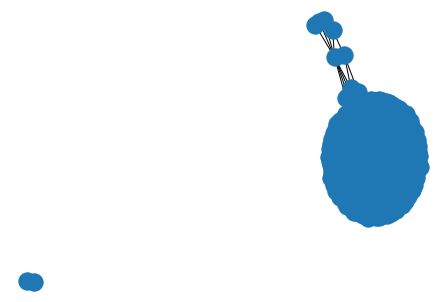

In [7]:
nx.draw(G)

If the network is small enough to visualize, and the node labels are small enough to fit in a circle, then you can use the `with_labels=True` argument.

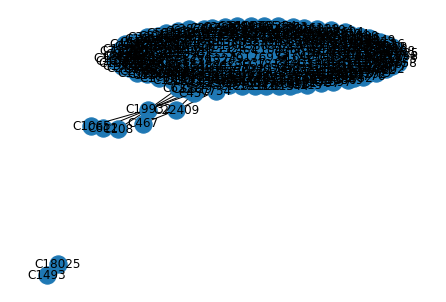

In [8]:
nx.draw(G, with_labels=True)

However, note that if the number of nodes in the graph gets really large, node-link diagrams can begin to look like massive hairballs. This is undesirable for graph visualization.

## Hubs: How do we evaluate the importance of some individuals in a network?

Within a social network, there will be certain individuals which perform certain important functions. For example, there may be hyper-connected individuals who are connected to many, many more people. They would be of use in the spreading of information. Alternatively, if this were a disease contact network, identifying them would be useful in stopping the spread of diseases. How would one identify these people?

### Approach 1: Neighbors
One way we could compute this is to find out the number of people an individual is conencted to. NetworkX let's us do this by giving us a G.neighbors(node) function.

In [8]:
# Let's find out the number of neighbors that individual #7 has.
len(list(G.neighbors('C1')))

1

#### Exercise 3

Can you create a ranked list of the importance of each individual, based on the number of neighbors they have? (3 min.)

Hint: One suggested output would be a list of tuples, where the first element in each tuple is the node ID (an integer number), and the second element is the number of neighbors that it has.

Hint: Python's sorted(iterable, key=lambda x:...., reverse=True) function may be of help here.

### Approach 2: Degree Centrality

The number of other nodes that one node is connected to is a measure of its centrality. NetworkX implements a degree centrality, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. This is accessed by using nx.degree_centrality(G)

In [9]:
# nx.degree_centrality(G)

# Uncomment the next line to show a truncated version.
list(nx.degree_centrality(G).items())[0:5]

[('C17693', 0.9736842105263157),
 ('C1003', 0.003289473684210526),
 ('C305', 0.003289473684210526),
 ('C728', 0.003289473684210526),
 ('C1173', 0.003289473684210526)]

There are other measures of centrality, namely betweenness centrality, flow centrality and load centrality. You can take a look at their definitions on the NetworkX API docs and their cited references. You can also define your own measures if those don't fit your needs, but that is an advanced topic that won't be dealt with here.

These slides/demos are based on concepts from: https://github.com/ericmjl/Network-Analysis-Made-Simple.